In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


![](http://)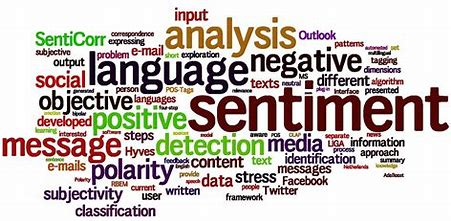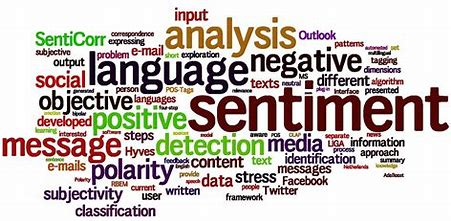

# IMPORT DATASET

In [2]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# Text Cleaning

1. 1. sample 10000 rows
1. 2. remove html tags
1. 3. removal special characters
1. 4.convereting everything to lower case
1. 5. removing stop word
1. 6.stemming

In [5]:
df = df.sample(10000)

In [6]:
df.shape

(10000, 2)

In [7]:
df['sentiment'].replace({'positive':1,'negative':0},inplace =True)

/tmp/ipykernel_18/1066844129.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive':1,'negative':0},inplace =True)
/tmp/ipykernel_18/1066844129.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'].replace({'positive':1,'negative':0},inplace =True)


In [8]:
df.head()

,review,sentiment
47843,This is one of the better classic Edgar Wallac...,1
3318,I had the pleasure of seeing this film at the ...,1
16071,Spider-Man is in my opinion the best superhero...,1
41814,This was a great movie for being only 67 minut...,1
41464,I recently found a copy for $5 at a video stor...,1


# Removal HTML tags

In [9]:
import re
clean = re.compile('<.*?>')
re.sub(clean, "",df.iloc[2].review)

"Spider-Man is in my opinion the best superhero ever, and this game is the best superhero game ever. While it may be somewhat easy, you have to play it several times to get all the costumes and comic book covers, which makes up for how easy it is to get through the game. It may seem hard to control at first, but once you get the hang of it, you will be web-slinging like Spider-Man himself.The bosses, while like the levels are somewhat easy, are fun. The first boss, Scorpion, is incredibly easy to beat, which shouldn't be so because as fans of the comic books know, Scorpion is one of Spider-Man's most deadly villains. The second boss, Rhino, is also very easy. The 3rd boss is Venom, who is in my opinion the easiest boss in the game, which definately shouldn't be. The 4th boss is Venom again. This time, he is a little bit more difficult to beat but still easy. The 5th boss is Mysterio, who I think is the funnest boss to battle in the game. He is also one of the harder bosses, but once ag

In [10]:
import re

def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, "", text)


In [11]:
df['review'] = df['review'].apply(clean_html)

In [12]:
df.head()

,review,sentiment
47843,This is one of the better classic Edgar Wallac...,1
3318,I had the pleasure of seeing this film at the ...,1
16071,Spider-Man is in my opinion the best superhero...,1
41814,This was a great movie for being only 67 minut...,1
41464,I recently found a copy for $5 at a video stor...,1


# Convert Lower Case

In [13]:
def convert_lower(text):
    return text.lower()

In [14]:
df['review'] = df['review'].apply(convert_lower)

# Removal_special_char

In [15]:
def remove_special(text):
    x =''
    
    for i in text:
        if i.isalnum():
            x = x+i
            
        else:
            x = x + ' '
            
    return x

In [16]:
df['review'] = df['review'].apply(convert_lower)

# Stopwords
 

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
df.head()

,review,sentiment
47843,this is one of the better classic edgar wallac...,1
3318,i had the pleasure of seeing this film at the ...,1
16071,spider-man is in my opinion the best superhero...,1
41814,this was a great movie for being only 67 minut...,1
41464,i recently found a copy for $5 at a video stor...,1


In [19]:
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text.split() if word.lower() not in stop_words]
    return filtered_words


In [20]:
df['review'] = df['review'].apply(remove_stopwords)

In [21]:
df.head()

,review,sentiment
47843,"[one, better, classic, edgar, wallace, movies,...",1
3318,"[pleasure, seeing, film, rhode, island, intern...",1
16071,"[spider-man, opinion, best, superhero, ever,, ...",1
41814,"[great, movie, 67, minutes, long., aspect, fil...",1
41464,"[recently, found, copy, $5, video, store,, sna...",1


In [22]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# stemming 

In [23]:
filtered_words = []
def stem_words(text):
    for i in text:
        filtered_words.append(ps.stem(i))
        
    z = filtered_words[:]
    filtered_words.clear()
    return z

In [24]:
df['review'] = df['review'].apply(stem_words)

# Joining

In [25]:
def join_back(list_input):
    return " ".join(list_input)


In [26]:
df['review'] = df['review'].apply(join_back)

In [27]:
df.head()

,review,sentiment
47843,one better classic edgar wallac movi german se...,1
3318,pleasur see film rhode island intern film fest...,1
16071,"spider-man opinion best superhero ever, game b...",1
41814,great movi 67 minut long. aspect film-noir con...,1
41464,"recent found copi $5 video store, snap eagerly...",1


# Count Vectorization

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1000)

In [29]:
X = cv.fit_transform(df['review']).toarray()

In [30]:
X.shape



(10000, 1000)

In [31]:
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [32]:
y = df.iloc[:,-1].values

In [33]:
y.shape

(10000,)

# Train_Test_Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =42)

# Naive_Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


In [37]:
clf1 = GaussianNB()
clf2 =  MultinomialNB() 
clf3 = BernoulliNB()

In [38]:
clf1 = clf1.fit(x_train,y_train)
clf2 =  clf2.fit(x_train,y_train) 
clf3 = clf3.fit(x_train,y_train)

In [39]:
y_pred1 = clf1.predict(x_test)
y_pred2 = clf2.predict(x_test)
y_pred3 = clf3.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score



In [41]:
accuracy_score(y_test,y_pred1)

0.7685

In [42]:
accuracy_score(y_test,y_pred2)

0.82

In [43]:
accuracy_score(y_test,y_pred3)

0.824